In [1]:
import polars as pl
import pandas as pd
import great_expectations as gx
from datetime import datetime

# Polars vs. Pandas (Data Analysis)
 - Extract file, Item_Category_PVO (filetype = csv, size = 1024098 kb, rows = 1048575, columns = 58)
 - Filter dataframe on single column name 'CATEGORYTRANSLATIONPEOCATEGORYNAME'
 - %%timeit will measure the execution speed
 - Blocks of code will run 7 times
 - Results are measured in milliseconds and seconds 
 - Tests run with 'Eager API' (Immediate Execution) and 'Lazy API' (Executed on Demand)

### Pandas Speed Test - DataFrame then Filter
- Count the value instances from a single identified column.

In [2]:
%%timeit

erp_data = "HP_SCS_INT_328_ItemCategoryPVO.csv"

df = pd.read_csv(erp_data)

filter_ = df["CATEGORYTRANSLATIONPEOCATEGORYNAME"].value_counts()

print(filter_.head())

BONE SCREWS OR PEGS    231203
SPINAL IMPLANTS        124983
KNEE JOINT IMPLANTS    104515
HIP JOINT IMPLANTS      86016
BONE PLATES             82387
Name: CATEGORYTRANSLATIONPEOCATEGORYNAME, dtype: int64
BONE SCREWS OR PEGS    231203
SPINAL IMPLANTS        124983
KNEE JOINT IMPLANTS    104515
HIP JOINT IMPLANTS      86016
BONE PLATES             82387
Name: CATEGORYTRANSLATIONPEOCATEGORYNAME, dtype: int64
BONE SCREWS OR PEGS    231203
SPINAL IMPLANTS        124983
KNEE JOINT IMPLANTS    104515
HIP JOINT IMPLANTS      86016
BONE PLATES             82387
Name: CATEGORYTRANSLATIONPEOCATEGORYNAME, dtype: int64
BONE SCREWS OR PEGS    231203
SPINAL IMPLANTS        124983
KNEE JOINT IMPLANTS    104515
HIP JOINT IMPLANTS      86016
BONE PLATES             82387
Name: CATEGORYTRANSLATIONPEOCATEGORYNAME, dtype: int64
BONE SCREWS OR PEGS    231203
SPINAL IMPLANTS        124983
KNEE JOINT IMPLANTS    104515
HIP JOINT IMPLANTS      86016
BONE PLATES             82387
Name: CATEGORYTRANSLATIONPEOCA

### Polars Speed Test - Eager API
- Count the value instances from a single identified column.

In [3]:
%%timeit

erp_data = "HP_SCS_INT_328_ItemCategoryPVO.csv"

df = pl.read_csv(erp_data)

filter_ = df.groupby(["CATEGORYTRANSLATIONPEOCATEGORYNAME"]).count().sort(by="count", reverse=True) 

print(filter_.head())

shape: (5, 2)
┌─────────────────────────────────────┬────────┐
│ CATEGORYTRANSLATIONPEOCATEGORYNA... ┆ count  │
│ ---                                 ┆ ---    │
│ str                                 ┆ u32    │
╞═════════════════════════════════════╪════════╡
│ BONE SCREWS OR PEGS                 ┆ 231203 │
│ SPINAL IMPLANTS                     ┆ 124983 │
│ KNEE JOINT IMPLANTS                 ┆ 104515 │
│ HIP JOINT IMPLANTS                  ┆ 86016  │
│ BONE PLATES                         ┆ 82387  │
└─────────────────────────────────────┴────────┘
shape: (5, 2)
┌─────────────────────────────────────┬────────┐
│ CATEGORYTRANSLATIONPEOCATEGORYNA... ┆ count  │
│ ---                                 ┆ ---    │
│ str                                 ┆ u32    │
╞═════════════════════════════════════╪════════╡
│ BONE SCREWS OR PEGS                 ┆ 231203 │
│ SPINAL IMPLANTS                     ┆ 124983 │
│ KNEE JOINT IMPLANTS                 ┆ 104515 │
│ HIP JOINT IMPLANTS                  ┆ 8

### Polars Speed Test - Lazy API
- Count the value instances from a single identified column.

In [4]:
%%timeit

erp_data = "HP_SCS_INT_328_ItemCategoryPVO.csv"

lazy_filter = (
    pl.scan_csv(erp_data)
    .select([pl.col("CATEGORYTRANSLATIONPEOCATEGORYNAME").value_counts(sort=True).alias("value, count")])
    .collect()
)

lazy_filter_ = (
    lazy_filter["value, count"]
    .struct.rename_fields(["category_value", "instance_count"])
    .alias("value, count")
    .to_frame()
    .unnest("value, count")
)

print(lazy_filter_)

shape: (315, 2)
┌────────────────────────────────┬────────────────┐
│ category_value                 ┆ instance_count │
│ ---                            ┆ ---            │
│ str                            ┆ u32            │
╞════════════════════════════════╪════════════════╡
│ BONE SCREWS OR PEGS            ┆ 231203         │
│ SPINAL IMPLANTS                ┆ 124983         │
│ KNEE JOINT IMPLANTS            ┆ 104515         │
│ HIP JOINT IMPLANTS             ┆ 86016          │
│ ...                            ┆ ...            │
│ TOOLS                          ┆ 25             │
│ DRUG ANORECTAL AGENTS          ┆ 24             │
│ AV SUPPLIES                    ┆ 22             │
│ BUILDING SUPPLIES - ELECTRICAL ┆ 21             │
└────────────────────────────────┴────────────────┘
shape: (315, 2)
┌────────────────────────────────┬────────────────┐
│ category_value                 ┆ instance_count │
│ ---                            ┆ ---            │
│ str                           

### Polars Speed Test - Lazy API - EXECUTION GRAPH
- Count the value instances from a single identified column.

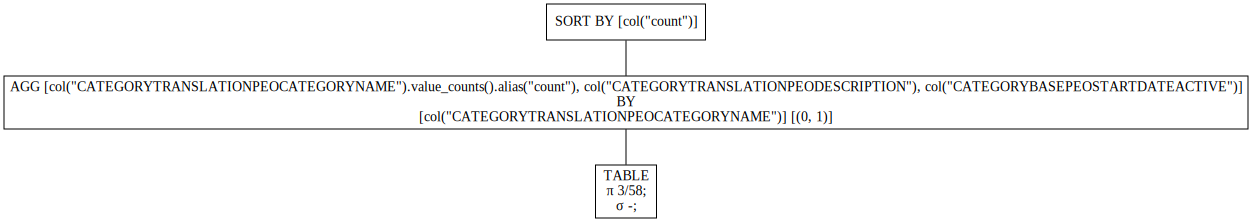

In [5]:
erp_data = "HP_SCS_INT_328_ItemCategoryPVO.csv"

lazy_filter = (
    pl.read_csv(erp_data)
    .lazy()
    .groupby("CATEGORYTRANSLATIONPEOCATEGORYNAME")
    .agg(
        [
            pl.col("CATEGORYTRANSLATIONPEOCATEGORYNAME").value_counts().alias("count"),
            pl.col("CATEGORYTRANSLATIONPEODESCRIPTION"),
            pl.col("CATEGORYBASEPEOSTARTDATEACTIVE"),
        ]
    )
    .sort("count", reverse=True)
)

lazy_filter.show_graph()

# Polars vs. Pandas (ETL)
- Extract file, Item_Category_PVO (filetype = csv, size = 1024098 kb, rows = 1048575, columns = 58)
- Additional extract file, ItemCategoryPVO_2 (filetype = csv, size = 32668 kb, rows = 51535, columns = 58)
- Aggregate the files to create a single dataframe. (Pandas compared to Polars)
- Set data quality expectations from the 'Great Expectations' Python library. Expectations include:
    1. Table column count to be between: 1048500, 1048579. 
    2. Table columns to match set: All current table headers. 
    3. Non-unique values in column: 'success' || 'failure' - 'CATALOGBASEPEOCATALOGCODE'.
    4. Column values to be of type: 'CATALOGBASEPEOSTRUCTUREID', 'int64'.
- Create an accuracy table to hold data quality results. Column headings: date, process name, and great expectation results.
- Each Python script instance will be ran once.

#### Pandas Flow: Aggregate csv files (pd.concat) ---> Pandas dataframe ---> GE read dataframe (gx.from_pandas) ---> Initialize expectations ---> Dictionary of results ---> Final dataframe (pd.Dataframe)

#### Polars Flow: Aggregate csv files (pl.concat) ---> Polars dataframe ---> Write a parquet file ---> GE read parquet file (gx.read_parquet) ---> Initialize expectations ---> Dictionary of results ---> Final dataframe (pl.Dataframe)

In [6]:
class BaseAggregationPandas:

    def __init__(self, entity_one, entity_two):
        self._entity_one = entity_one
        self._entity_two = entity_two

    @property
    def aggregate_files(self):
        return self._entity_one, self._entity_two

    @aggregate_files.setter
    def aggregate_files(self, file_one, file_two):
        self._entity_one = file_one
        self._entity_two = file_two

    @aggregate_files.deleter
    def aggregate_files(self):
        del self._entity_one, self._entity_two

    @property
    def join_dataframes(self):
        first_frame, second_frame = pd.read_csv(self._entity_one), pd.read_csv(self._entity_two)
        join = pd.concat([first_frame, second_frame])
        return join

In [7]:
pandas = BaseAggregationPandas('HP_SCS_INT_328_ItemCategoryPVO.csv', 'HP_SCS_INT_328_ItemCategoryPVO_2.csv')

pandas.aggregate_files

pandas.join_dataframes

,CATALOGBASEPEOCATALOGCODE,CATALOGBASEPEOCATALOGCONTENTCODE,CATALOGBASEPEOCATEGORYSETID,CATALOGBASEPEOCONTROLLEVEL,CATALOGBASEPEODEFAULTCATEGORYID,CATALOGBASEPEOENDDATE,CATALOGBASEPEOHIERARCHYENABLED,CATALOGBASEPEOLASTUPDATEDATE,CATALOGBASEPEOMULTITEMCATASSIGNFLAG,CATALOGBASEPEOSHARINGCONTENTCODE,...,CATEGORYTRANSLATIONPEOLANGUAGE,CATEGORYTRANSLATIONPEOLASTUPDATEDATE,INVENTORYITEMID,ITEMCATEGORYPEOCREATEDBY,ITEMCATEGORYPEOCREATIONDATE,ITEMCATEGORYPEOLASTUPDATEDATE,ITEMCATEGORYPEOLASTUPDATEDBY,ORGANIZATIONID,VALIDCATEGORYPEOENDDATE,VALIDCATEGORYPEOLASTUPDATEDATE
0,HP_MAIN_CATALOG,LEAF_ITEMS,300000004433069,1,300000004455617,NaN,N,2022-04-06 09:44:03.000000,N,NaN,...,US,2022-04-06 09:39:57.086000,100000003785068,CONV_USER,2022-04-28 07:51:46.700000,2022-04-29 11:35:46.261000,CONV_USER,300000004498154,NaN,2022-04-06 09:44:12.792000
1,HP_MAIN_CATALOG,LEAF_ITEMS,300000004433069,1,300000004455617,NaN,N,2022-04-06 09:44:03.000000,N,NaN,...,US,2022-04-06 09:39:57.086000,100000003785069,CONV_USER,2022-04-28 23:55:56.303000,2022-04-29 11:35:55.560000,CONV_USER,300000004498154,NaN,2022-04-06 09:44:12.792000
2,HP_MAIN_CATALOG,LEAF_ITEMS,300000004433069,1,300000004455617,NaN,N,2022-04-06 09:44:03.000000,N,NaN,...,US,2022-04-06 09:39:57.086000,100000003785070,CONV_USER,2022-04-28 23:56:56.002000,2022-04-29 11:36:03.198000,CONV_USER,300000004498154,NaN,2022-04-06 09:44:12.792000
3,HP_MAIN_CATALOG,LEAF_ITEMS,300000004433069,1,300000004455617,NaN,N,2022-04-06 09:44:03.000000,N,NaN,...,US,2022-04-06 09:39:57.086000,100000003785071,CONV_USER,2022-04-28 23:57:55.110000,2022-04-29 11:36:14.283000,CONV_USER,300000004498154,NaN,2022-04-06 09:44:12.792000
4,HP_MAIN_CATALOG,LEAF_ITEMS,300000004433069,1,300000004455617,NaN,N,2022-04-06 09:44:03.000000,N,NaN,...,US,2022-04-06 09:39:57.086000,100000003785072,CONV_USER,2022-04-28 23:58:55.746000,2022-04-29 11:36:24.187000,CONV_USER,300000004498154,NaN,2022-04-06 09:44:12.792000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51530,HP_MAIN_CATALOG,LEAF_ITEMS,300000004433069,1,300000004455617,NaN,N,2022-04-06 09:44:03.000000,N,NaN,...,US,2022-04-06 09:39:57.112000,100000003825084,CONV_USER,2022-04-28 11:59:31.473000,2022-04-29 11:41:04.558000,CONV_USER,300000004498238,NaN,2022-04-06 09:44:12.797000
51531,HP_MAIN_CATALOG,LEAF_ITEMS,300000004433069,1,300000004455617,NaN,N,2022-04-06 09:44:03.000000,N,NaN,...,US,2022-04-06 09:39:57.131000,100000003825085,CONV_USER,2022-04-28 12:00:40.593000,2022-04-29 11:41:19.420000,CONV_USER,300000004498238,NaN,2022-04-06 09:44:12.801000
51532,HP_MAIN_CATALOG,LEAF_ITEMS,300000004433069,1,300000004455617,NaN,N,2022-04-06 09:44:03.000000,N,NaN,...,US,2022-04-06 09:39:57.087000,100000003825086,CONV_USER,2022-04-28 12:01:47.724000,2022-04-29 11:41:35.216000,CONV_USER,300000004498238,NaN,2022-04-06 09:44:12.792000
51533,HP_MAIN_CATALOG,LEAF_ITEMS,300000004433069,1,300000004455617,NaN,N,2022-04-06 09:44:03.000000,N,NaN,...,US,2022-04-06 09:39:56.997000,100000003825087,CONV_USER,2022-04-28 12:02:52.469000,2022-04-29 11:41:47.232000,CONV_USER,300000004498238,NaN,2022-04-06 09:44:12.773000


In [8]:
class BaseExpectationsPandas:
    date = datetime.now().strftime('%m/%d/%y')

    def __init__(self, entity):
        self._entity = entity
        self._data_frame = None
        self._multiple_entity = [entity]
        self._accuracy_table = {'date_time': [self.date], 'process_name': [entity]}

# ---- GETTER | SETTER | DELETE ---- 
    @property
    def entity(self):
        return self._entity

    @entity.setter
    def entity(self, entity):
        self._entity = entity

    @entity.deleter
    def entity(self):
        del self._entity

# ---- SELECT ----
    @property
    def select_dataframe(self):
        self._data_frame = gx.from_pandas(self._entity)
        return self._data_frame

# ---- UPDATE ----    
    def update_entity_list(self, new_entity):
        self._multiple_entity.append(new_entity)

# ---- GREAT EXPECTATIONS ----
    def row_count_variance(self, expected_min=None, expected_max=None):
        expectation = self._data_frame.expect_table_column_count_to_be_between(expected_min, expected_max)
        (self._accuracy_table['expected_min_rowcount'], 
        self._accuracy_table['expected_max_rowcount'], 
        self._accuracy_table['meets_rowcount_expectation']) = (
            [expected_min], 
            [expected_max], 
            [expectation['success']]
            )
        
    def column_set_match(self, column_list=None):
        expectation = self._data_frame.expect_table_columns_to_match_set(column_list, exact_match=True)
        self._accuracy_table['all_columns_match'] = [expectation['success']]

    def non_unique(self, column=None):
        expectation = self._data_frame.expect_column_values_to_be_unique(column)
        if expectation['success'] == 'false':
            expectation == 'true'
        self._accuracy_table['columns_are_unique'] = [expectation['success']]

    def column_value_type(self, column=None, type=None):
        expectation = self._data_frame.expect_column_values_to_be_of_type(column, type)
        (self._accuracy_table['column'],
        self._accuracy_table['column_type_expected'],
        self._accuracy_table['column_type_actual']) = (
            [column],
            [type],
            [expectation['success']]
            )

In [9]:
class BaseTablePandas(BaseExpectationsPandas):
    
    def __init__(self, entity, expectation_table=None):
        super().__init__(entity)
        self._expectation_table = expectation_table

# ---- GETTER | SETTER | DELETE ----  
    @property
    def expectation_table(self):
        return self._expectation_table

    @expectation_table.setter
    def expectation_table(self, expectation_table):
        self._expectation_table = expectation_table
       
    @expectation_table.deleter
    def expectation_table(self):
        del self._expectation_table

# ---- SELECT ----
    @property
    def select_expectation_table(self):
        self._expectation_table = pd.DataFrame(self._accuracy_table)
        return self._expectation_table

In [10]:
def main():

    b = BaseTablePandas(pandas.join_dataframes)

    b.select_dataframe

    b.row_count_variance(1048500, 1048579)

    b.non_unique('CATALOGBASEPEOCATALOGCODE')

    b.column_value_type('CATALOGBASEPEOSTRUCTUREID', 'int64')

    b.column_set_match([
        'CATALOGBASEPEOCATALOGCODE',
        'CATALOGBASEPEOCATALOGCONTENTCODE',
        'CATALOGBASEPEOCATEGORYSETID',
        'CATALOGBASEPEOCONTROLLEVEL',
        'CATALOGBASEPEODEFAULTCATEGORYID',
        'CATALOGBASEPEOENDDATE',
        'CATALOGBASEPEOHIERARCHYENABLED',
        'CATALOGBASEPEOLASTUPDATEDATE',
        'CATALOGBASEPEOMULTITEMCATASSIGNFLAG',
        'CATALOGBASEPEOSHARINGCONTENTCODE',
        'CATALOGBASEPEOSOURCECATEGORYSETID',
        'CATALOGBASEPEOSTARTDATE',
        'CATALOGBASEPEOSTATUSFLAG',
        'CATALOGBASEPEOSTRUCTUREID',
        'CATALOGBASEPEOVALIDATEFLAG',
        'CATALOGTRANSLATIONPEOCATEGORYSETNAME',
        'CATALOGTRANSLATIONPEODESCRIPTION',
        'CATALOGTRANSLATIONPEOLANGUAGE',
        'CATALOGTRANSLATIONPEOLASTUPDATEDATE',
        'CATEGORYBASEPEOCATEGORYCODE',
        'CATEGORYBASEPEOCATEGORYCONTENTCODE',
        'CATEGORYBASEPEOENDDATEACTIVE',
        'CATEGORYBASEPEOLASTUPDATEDATE',
        'CATEGORYBASEPEOSEGMENT1',
        'CATEGORYBASEPEOSEGMENT10',
        'CATEGORYBASEPEOSEGMENT11',
        'CATEGORYBASEPEOSEGMENT12',
        'CATEGORYBASEPEOSEGMENT13',
        'CATEGORYBASEPEOSEGMENT14',
        'CATEGORYBASEPEOSEGMENT15',
        'CATEGORYBASEPEOSEGMENT16',
        'CATEGORYBASEPEOSEGMENT17',
        'CATEGORYBASEPEOSEGMENT18',
        'CATEGORYBASEPEOSEGMENT19',
        'CATEGORYBASEPEOSEGMENT2',
        'CATEGORYBASEPEOSEGMENT20',
        'CATEGORYBASEPEOSEGMENT3',
        'CATEGORYBASEPEOSEGMENT4',
        'CATEGORYBASEPEOSEGMENT5',
        'CATEGORYBASEPEOSEGMENT6',
        'CATEGORYBASEPEOSEGMENT7',
        'CATEGORYBASEPEOSEGMENT8',
        'CATEGORYBASEPEOSEGMENT9',
        'CATEGORYBASEPEOSTARTDATEACTIVE',
        'CATEGORYID',
        'CATEGORYSETID',
        'CATEGORYTRANSLATIONPEOCATEGORYNAME',
        'CATEGORYTRANSLATIONPEODESCRIPTION',
        'CATEGORYTRANSLATIONPEOLANGUAGE',
        'CATEGORYTRANSLATIONPEOLASTUPDATEDATE',
        'INVENTORYITEMID',
        'ITEMCATEGORYPEOCREATEDBY',
        'ITEMCATEGORYPEOCREATIONDATE',
        'ITEMCATEGORYPEOLASTUPDATEDATE',
        'ITEMCATEGORYPEOLASTUPDATEDBY',
        'ORGANIZATIONID',
        'VALIDCATEGORYPEOENDDATE',
        'VALIDCATEGORYPEOLASTUPDATEDATE' 
    ])

    b._accuracy_table

    display(b.select_expectation_table)

if __name__=="__main__":
    main()

,date_time,process_name,expected_min_rowcount,expected_max_rowcount,meets_rowcount_expectation,columns_are_unique,column,column_type_expected,column_type_actual,all_columns_match
0,02/24/23,CATALOGBASEPEOCATALOGCODE CATALOGBASEPEO...,1048500,1048579,False,False,CATALOGBASEPEOSTRUCTUREID,int64,True,True


In [13]:
class BaseAggregationPolars:

    def __init__(self, entity_one, entity_two):
        self._entity_one = entity_one
        self._entity_two = entity_two

    @property
    def aggregate_files(self):
        return self._entity_one, self._entity_two

    @aggregate_files.setter
    def aggregate_files(self, file_one, file_two):
        self._entity_one = file_one
        self._entity_two = file_two

    @aggregate_files.deleter
    def aggregate_files(self):
        del self._entity_one, self._entity_two

    @property
    def join_dataframes(self):
        first_frame, second_frame = pl.read_csv(self._entity_one), pl.read_csv(self._entity_two)
        join = pl.concat([first_frame, second_frame])
        join.write_parquet('aggregate_file.parquet')
        return join

In [14]:
polars = BaseAggregationPolars('HP_SCS_INT_328_ItemCategoryPVO.csv', 'HP_SCS_INT_328_ItemCategoryPVO_2.csv')

polars.aggregate_files

polars.join_dataframes

CATALOGBASEPEOCATALOGCODE,CATALOGBASEPEOCATALOGCONTENTCODE,CATALOGBASEPEOCATEGORYSETID,CATALOGBASEPEOCONTROLLEVEL,CATALOGBASEPEODEFAULTCATEGORYID,CATALOGBASEPEOENDDATE,CATALOGBASEPEOHIERARCHYENABLED,CATALOGBASEPEOLASTUPDATEDATE,CATALOGBASEPEOMULTITEMCATASSIGNFLAG,CATALOGBASEPEOSHARINGCONTENTCODE,CATALOGBASEPEOSOURCECATEGORYSETID,CATALOGBASEPEOSTARTDATE,CATALOGBASEPEOSTATUSFLAG,CATALOGBASEPEOSTRUCTUREID,CATALOGBASEPEOVALIDATEFLAG,CATALOGTRANSLATIONPEOCATEGORYSETNAME,CATALOGTRANSLATIONPEODESCRIPTION,CATALOGTRANSLATIONPEOLANGUAGE,CATALOGTRANSLATIONPEOLASTUPDATEDATE,CATEGORYBASEPEOCATEGORYCODE,CATEGORYBASEPEOCATEGORYCONTENTCODE,CATEGORYBASEPEOENDDATEACTIVE,CATEGORYBASEPEOLASTUPDATEDATE,CATEGORYBASEPEOSEGMENT1,CATEGORYBASEPEOSEGMENT10,CATEGORYBASEPEOSEGMENT11,CATEGORYBASEPEOSEGMENT12,CATEGORYBASEPEOSEGMENT13,CATEGORYBASEPEOSEGMENT14,CATEGORYBASEPEOSEGMENT15,CATEGORYBASEPEOSEGMENT16,CATEGORYBASEPEOSEGMENT17,CATEGORYBASEPEOSEGMENT18,CATEGORYBASEPEOSEGMENT19,CATEGORYBASEPEOSEGMENT2,CATEGORYBASEPEOSEGMENT20,CATEGORYBASEPEOSEGMENT3,CATEGORYBASEPEOSEGMENT4,CATEGORYBASEPEOSEGMENT5,CATEGORYBASEPEOSEGMENT6,CATEGORYBASEPEOSEGMENT7,CATEGORYBASEPEOSEGMENT8,CATEGORYBASEPEOSEGMENT9,CATEGORYBASEPEOSTARTDATEACTIVE,CATEGORYID,CATEGORYSETID,CATEGORYTRANSLATIONPEOCATEGORYNAME,CATEGORYTRANSLATIONPEODESCRIPTION,CATEGORYTRANSLATIONPEOLANGUAGE,CATEGORYTRANSLATIONPEOLASTUPDATEDATE,INVENTORYITEMID,ITEMCATEGORYPEOCREATEDBY,ITEMCATEGORYPEOCREATIONDATE,ITEMCATEGORYPEOLASTUPDATEDATE,ITEMCATEGORYPEOLASTUPDATEDBY,ORGANIZATIONID,VALIDCATEGORYPEOENDDATE,VALIDCATEGORYPEOLASTUPDATEDATE
str,str,i64,i64,i64,str,str,str,str,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,str,str,str,str,i64,str,str,str,str,i64,str,str
"""HP_MAIN_CATALO...","""LEAF_ITEMS""",300000004433069,1,300000004455617,"""""","""N""","""2022-04-06 09:...","""N""","""""","""""","""2022-04-06""","""""",15,"""Y""","""HP_MAIN_CATALO...","""HP_MAIN_CATALO...","""US""","""2022-04-06 09:...","""INJECTION AND ...","""ITEM_ONLY""","""""","""2022-04-06 10:...","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""2022-04-06""",300000004455458,300000004433069,"""INJECTION AND ...","""INJECTION AND ...","""US""","""2022-04-06 09:...",100000003785068,"""CONV_USER""","""2022-04-28 07:...","""2022-04-29 11:...","""CONV_USER""",300000004498154,"""""","""2022-04-06 09:..."
"""HP_MAIN_CATALO...","""LEAF_ITEMS""",300000004433069,1,300000004455617,"""""","""N""","""2022-04-06 09:...","""N""","""""","""""","""2022-04-06""","""""",15,"""Y""","""HP_MAIN_CATALO...","""HP_MAIN_CATALO...","""US""","""2022-04-06 09:...","""INJECTION AND ...","""ITEM_ONLY""","""""","""2022-04-06 10:...","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""2022-04-06""",300000004455458,300000004433069,"""INJECTION AND ...","""INJECTION AND ...","""US""","""2022-04-06 09:...",100000003785069,"""CONV_USER""","""2022-04-28 23:...","""2022-04-29 11:...","""CONV_USER""",300000004498154,"""""","""2022-04-06 09:..."
"""HP_MAIN_CATALO...","""LEAF_ITEMS""",300000004433069,1,300000004455617,"""""","""N""","""2022-04-06 09:...","""N""","""""","""""","""2022-04-06""","""""",15,"""Y""","""HP_MAIN_CATALO...","""HP_MAIN_CATALO...","""US""","""2022-04-06 09:...","""INJECTION AND ...","""ITEM_ONLY""","""""","""2022-04-06 10:...","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""2022-04-06""",300000004455458,300000004433069,"""INJECTION AND ...","""INJECTION AND ...","""US""","""2022-04-06 09:...",100000003785070,"""CONV_USER""","""2022-04-28 23:...","""2022-04-29 11:...","""CONV_USER""",300000004498154,"""""","""2022-04-06 09:..."
"""HP_MAIN_CATALO...","""LEAF_ITEMS""",300000004433069,1,30000000

In [15]:
class BaseExpectationsPolars:
    date = datetime.now().strftime('%m/%d/%y')

    def __init__(self, entity):
        self._entity = entity
        self._data_frame = None
        self._multiple_entity = [entity]
        self._accuracy_table = {'date_time': [self.date], 'process_name': [entity]}

# ---- GETTER | SETTER | DELETE ---- 
    @property
    def entity(self):
        return self._entity

    @entity.setter
    def entity(self, entity):
        self._entity = entity

    @entity.deleter
    def entity(self):
        del self._entity

# ---- SELECT ----
    @property
    def select_dataframe(self):
        self._data_frame = gx.read_parquet(self._entity)
        return self._data_frame

# ---- UPDATE ----    
    def update_entity_list(self, new_entity):
        self._multiple_entity.append(new_entity)

# ---- GREAT EXPECTATIONS ----
    def row_count_variance(self, expected_min=None, expected_max=None):
        expectation = self._data_frame.expect_table_column_count_to_be_between(expected_min, expected_max)
        (self._accuracy_table['expected_min_rowcount'], 
        self._accuracy_table['expected_max_rowcount'], 
        self._accuracy_table['meets_rowcount_expectation']) = (
            [expected_min], 
            [expected_max], 
            [expectation['success']]
            )
        
    def column_set_match(self, column_list=None):
        expectation = self._data_frame.expect_table_columns_to_match_set(column_list, exact_match=True)
        self._accuracy_table['all_columns_match'] = [expectation['success']]

    def non_unique(self, column=None):
        expectation = self._data_frame.expect_column_values_to_be_unique(column)
        if expectation['success'] == 'false':
            expectation == 'true'
        self._accuracy_table['columns_are_unique'] = [expectation['success']]

    def column_value_type(self, column=None, type=None):
        expectation = self._data_frame.expect_column_values_to_be_of_type(column, type)
        (self._accuracy_table['column'],
        self._accuracy_table['column_type_expected'],
        self._accuracy_table['column_type_actual']) = (
            [column],
            [type],
            [expectation['success']]
            )

In [16]:
class BaseTablePolars(BaseExpectationsPolars):
    
    def __init__(self, entity, expectation_table=None):
        super().__init__(entity)
        self._expectation_table = expectation_table

# ---- GETTER | SETTER | DELETE ----  
    @property
    def expectation_table(self):
        return self._expectation_table

    @expectation_table.setter
    def expectation_table(self, expectation_table):
        self._expectation_table = expectation_table
       
    @expectation_table.deleter
    def expectation_table(self):
        del self._expectation_table

# ---- SELECT ----
    @property
    def select_expectation_table(self):
        self._expectation_table = pl.DataFrame(self._accuracy_table)
        return self._expectation_table

In [17]:
def main():

    b = BaseTablePolars('aggregate_file.parquet')
    
    b.select_dataframe
    
    b.row_count_variance(1048500, 1048579)
    
    b.non_unique('CATALOGBASEPEOCATALOGCODE')
    
    b.column_value_type('CATALOGBASEPEOSTRUCTUREID', 'int64')
    
    b.column_set_match([
        'CATALOGBASEPEOCATALOGCODE',
        'CATALOGBASEPEOCATALOGCONTENTCODE',
        'CATALOGBASEPEOCATEGORYSETID',
        'CATALOGBASEPEOCONTROLLEVEL',
        'CATALOGBASEPEODEFAULTCATEGORYID',
        'CATALOGBASEPEOENDDATE',
        'CATALOGBASEPEOHIERARCHYENABLED',
        'CATALOGBASEPEOLASTUPDATEDATE',
        'CATALOGBASEPEOMULTITEMCATASSIGNFLAG',
        'CATALOGBASEPEOSHARINGCONTENTCODE',
        'CATALOGBASEPEOSOURCECATEGORYSETID',
        'CATALOGBASEPEOSTARTDATE',
        'CATALOGBASEPEOSTATUSFLAG',
        'CATALOGBASEPEOSTRUCTUREID',
        'CATALOGBASEPEOVALIDATEFLAG',
        'CATALOGTRANSLATIONPEOCATEGORYSETNAME',
        'CATALOGTRANSLATIONPEODESCRIPTION',
        'CATALOGTRANSLATIONPEOLANGUAGE',
        'CATALOGTRANSLATIONPEOLASTUPDATEDATE',
        'CATEGORYBASEPEOCATEGORYCODE',
        'CATEGORYBASEPEOCATEGORYCONTENTCODE',
        'CATEGORYBASEPEOENDDATEACTIVE',
        'CATEGORYBASEPEOLASTUPDATEDATE',
        'CATEGORYBASEPEOSEGMENT1',
        'CATEGORYBASEPEOSEGMENT10',
        'CATEGORYBASEPEOSEGMENT11',
        'CATEGORYBASEPEOSEGMENT12',
        'CATEGORYBASEPEOSEGMENT13',
        'CATEGORYBASEPEOSEGMENT14',
        'CATEGORYBASEPEOSEGMENT15',
        'CATEGORYBASEPEOSEGMENT16',
        'CATEGORYBASEPEOSEGMENT17',
        'CATEGORYBASEPEOSEGMENT18',
        'CATEGORYBASEPEOSEGMENT19',
        'CATEGORYBASEPEOSEGMENT2',
        'CATEGORYBASEPEOSEGMENT20',
        'CATEGORYBASEPEOSEGMENT3',
        'CATEGORYBASEPEOSEGMENT4',
        'CATEGORYBASEPEOSEGMENT5',
        'CATEGORYBASEPEOSEGMENT6',
        'CATEGORYBASEPEOSEGMENT7',
        'CATEGORYBASEPEOSEGMENT8',
        'CATEGORYBASEPEOSEGMENT9',
        'CATEGORYBASEPEOSTARTDATEACTIVE',
        'CATEGORYID',
        'CATEGORYSETID',
        'CATEGORYTRANSLATIONPEOCATEGORYNAME',
        'CATEGORYTRANSLATIONPEODESCRIPTION',
        'CATEGORYTRANSLATIONPEOLANGUAGE',
        'CATEGORYTRANSLATIONPEOLASTUPDATEDATE',
        'INVENTORYITEMID',
        'ITEMCATEGORYPEOCREATEDBY',
        'ITEMCATEGORYPEOCREATIONDATE',
        'ITEMCATEGORYPEOLASTUPDATEDATE',
        'ITEMCATEGORYPEOLASTUPDATEDBY',
        'ORGANIZATIONID',
        'VALIDCATEGORYPEOENDDATE',
        'VALIDCATEGORYPEOLASTUPDATEDATE' 
    ])
    
    b._accuracy_table
    
    display(b.select_expectation_table)

if __name__=="__main__":
    main()

date_time,process_name,expected_min_rowcount,expected_max_rowcount,meets_rowcount_expectation,columns_are_unique,column,column_type_expected,column_type_actual,all_columns_match
str,str,i64,i64,bool,bool,str,str,bool,bool
"""02/24/23""","""aggregate_file...",1048500,1048579,false,false,"""CATALOGBASEPEO...","""int64""",true,true
